<a href="https://colab.research.google.com/github/shyguuy/lab/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [3]:
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature') # температура
server_load = ctrl.Antecedent(np.arange(0, 101, 1), 'server_load') # нагрузка на сервер

fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed') # скорость вентилятора

Функции принадлежности для температуры:

In [4]:
temperature['low'] = fuz.trimf(temperature.universe, [0, 0, 50])
temperature['optimal'] = fuz.trapmf(temperature.universe, [30, 50, 60, 80])
temperature['high'] = fuz.trimf(temperature.universe, [60, 100, 100])

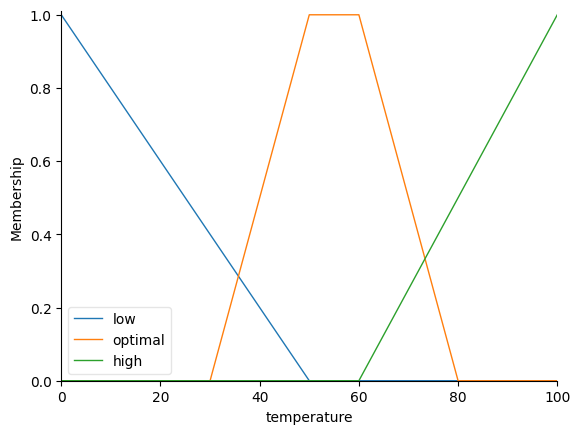

In [7]:
temperature.view()

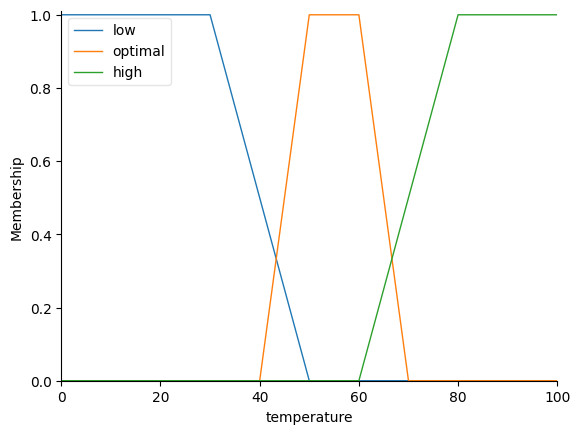

In [16]:
#temperature['low'] = fuz.trapmf(temperature.universe, [0, 0, 30, 50])
#temperature['optimal'] = fuz.trapmf(temperature.universe, [40, 50, 60, 70])
#temperature['high'] = fuz.trapmf(temperature.universe, [60, 80, 100, 100])
#temperature.view()

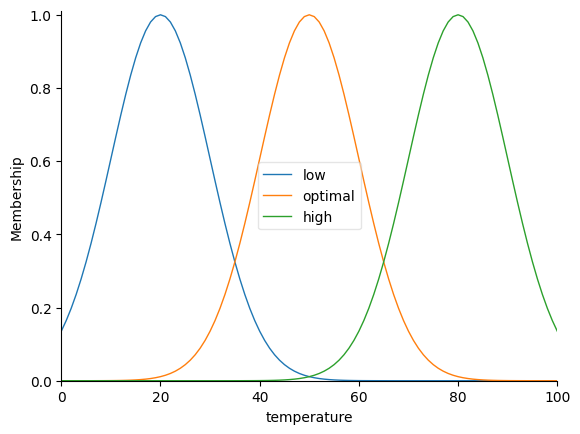

In [17]:
#temperature['low'] = fuz.gaussmf(temperature.universe, mean=20, sigma=10)
#temperature['optimal'] = fuz.gaussmf(temperature.universe, mean=50, sigma=10)
#temperature['high'] = fuz.gaussmf(temperature.universe, mean=80, sigma=10)
#temperature.view()

Функции принадлежности для нагрузки на серверы:

In [5]:
server_load['low'] = fuz.trimf(server_load.universe, [0, 0, 50])
server_load['medium'] = fuz.gaussmf(server_load.universe, mean=50, sigma=15)
server_load['high'] = fuz.trimf(server_load.universe, [50, 100, 100])

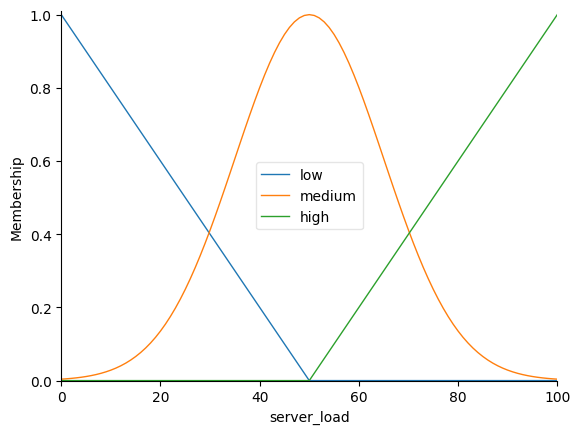

In [8]:
server_load.view()

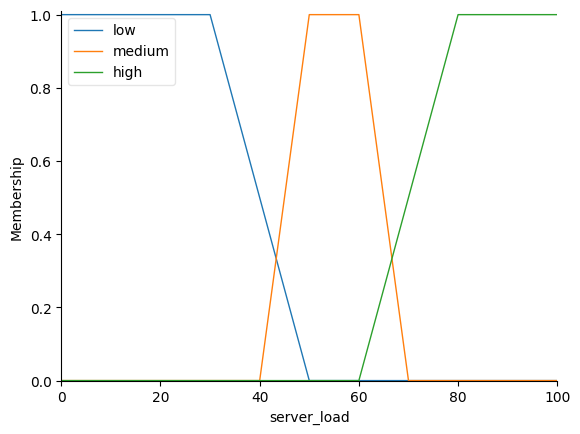

In [19]:
#server_load['low'] = fuz.trapmf(server_load.universe, [0, 0, 30, 50])
#server_load['medium'] = fuz.trapmf(server_load.universe, [40, 50, 60, 70])
#server_load['high'] = fuz.trapmf(server_load.universe, [60, 80, 100, 100])
#server_load.view()

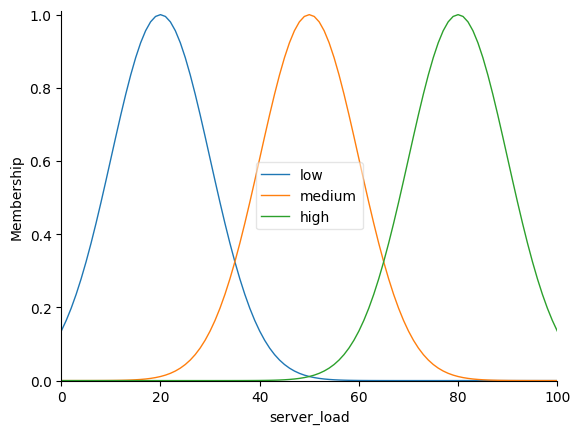

In [20]:
#server_load['low'] = fuz.gaussmf(server_load.universe, mean=20, sigma=10)
#server_load['medium'] = fuz.gaussmf(server_load.universe, mean=50, sigma=10)
#server_load['high'] = fuz.gaussmf(server_load.universe, mean=80, sigma=10)
#server_load.view()

Функции принадлежности для скорости вентилятора:


In [6]:
fan_speed['low'] = fuz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuz.trimf(fan_speed.universe, [50, 100, 100])

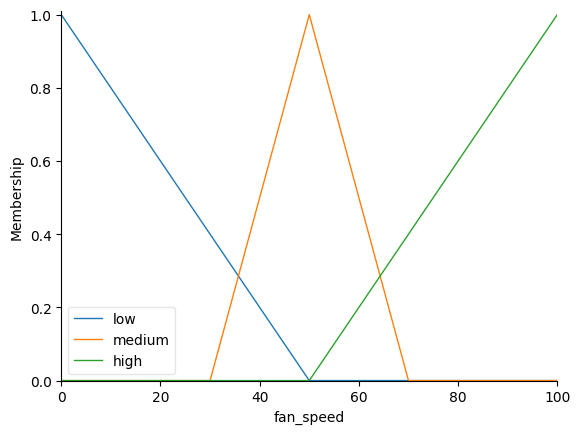

In [9]:
fan_speed.view()

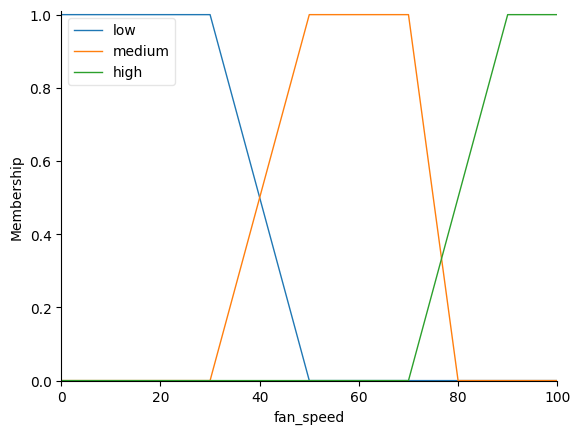

In [21]:
#fan_speed['low'] = fuz.trapmf(fan_speed.universe, [0, 0, 30, 50])
#fan_speed['medium'] = fuz.trapmf(fan_speed.universe, [30, 50, 70, 80])
#fan_speed['high'] = fuz.trapmf(fan_speed.universe, [70, 90, 100, 100])
#fan_speed.view()

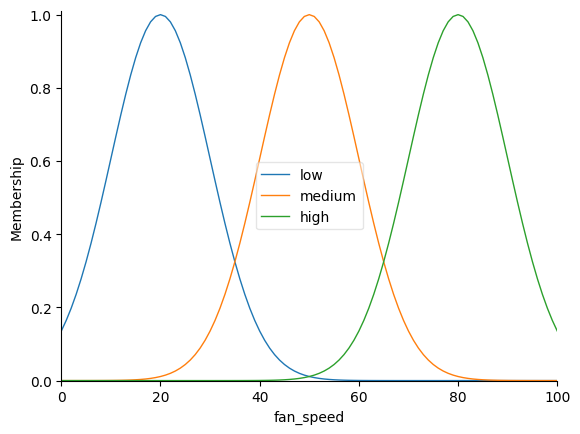

In [22]:
#fan_speed['low'] = fuz.gaussmf(fan_speed.universe, mean=20, sigma=10)
#fan_speed['medium'] = fuz.gaussmf(fan_speed.universe, mean=50, sigma=10)
#fan_speed['high'] = fuz.gaussmf(fan_speed.universe, mean=80, sigma=10)
#fan_speed.view()

Правила:

In [10]:
rule1 = ctrl.Rule(temperature['high'] & server_load['high'], fan_speed['high'])
rule2 = ctrl.Rule(temperature['low'] & server_load['low'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['optimal'] & server_load['medium'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['high'] & server_load['medium'], fan_speed['medium'])
rule5 = ctrl.Rule(temperature['optimal'] & server_load['high'], fan_speed['high'])

Система управления вентилятором:

In [11]:
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
fan = ctrl.ControlSystemSimulation(fan_ctrl)

In [12]:
fan.input['temperature'] = 70  # высокая температура
fan.input['server_load'] = 80  # высокая нагрузка

fan.compute()

print(f"Скорость вентилятора: {fan.output['fan_speed']}")


Скорость вентилятора: 75.32491118475284


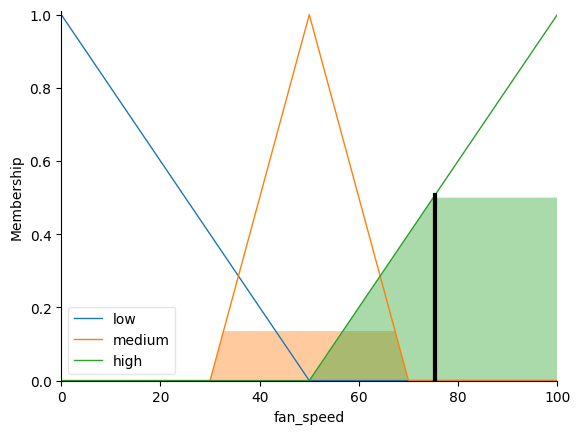

In [13]:
fan_speed.view(sim = fan)